# Covariance Conversion

## From resonnance parameters to WMP covariance


### A 1-level-1channel toy Problem

This program implements in Python 3 :
      - a toy-problem for conversion using the contour integral method
      - conversions for poles an residues
      - plots things

NOTE : author is Pablo DUCRU, for any inquires please e-mail at  *** p_ducru@mit.edu ***

In [1]:
## Import Python package for linear algebra
import numpy as np

In [2]:
## Importing Python packages for plotting
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator, FormatStrFormatter


Import local data and functions

In [3]:
from slbw import  evaluate_Σγ, dΣγ_dΓ
from data import a_U238, ρ0_U238, ρ0, μ_E0_U238, μ_Γn_U238, μ_Γγ_U238, μ_Γ_U238, cov_Γ_U238 
from vector_fit import VF_algorithm



## Nuclear Cross Section Model (SLBW for this benchmark)

#### Plotting the cross section

In [4]:
# Energy grid structure
E_max = 10**4 # Minimum energy of the energy groups
E_min = 10**-2 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ

# number densities (corrected to include the spin statistical factors)
N_densities = np.array([1,(0.124954)*1.0])

# scattering cross section
σ_nn = 0.166810

In [5]:
E_g.shape

(1000,)

In [6]:
E_grid = np.logspace(-2,4,N_g)

In [7]:
E_grid.shape

(1000,)

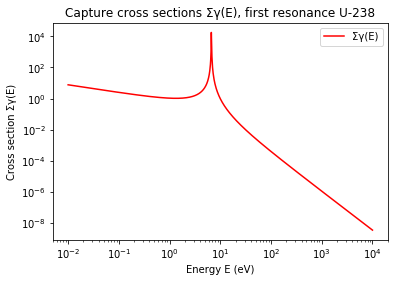

In [8]:
## Plot the mean cross section values. 
titre_Σ = 'Capture cross sections Σγ(E), first resonance U-238'
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.array([evaluate_Σγ(E_g[g], μ_Γ_U238) for g in range(E_g.size)]) , '-r', label='Σγ(E)') 
plt.ylabel('Cross section Σγ(E)')
plt.xlabel('Energy E (eV)')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

#### SLBW derivative equations

In [9]:
ε = 0.000001 
Γ_U238_ε_E0 = np.array([μ_E0_U238 + ε, μ_Γn_U238, μ_Γγ_U238])
Γ_U238_ε_Γn = np.array([μ_E0_U238 , μ_Γn_U238 + ε, μ_Γγ_U238])
Γ_U238_ε_Γγ = np.array([μ_E0_U238, μ_Γn_U238, μ_Γγ_U238 + ε])


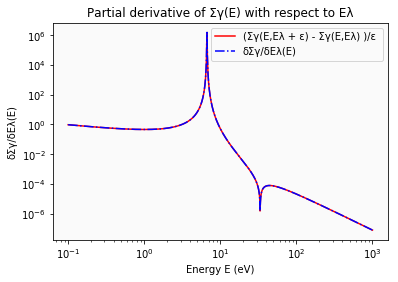

In [10]:
# Energy grid structure
E_max = 10**3 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ

## Plot the mean cross section values. 
plot_title = 'Partial derivative of Σγ(E) with respect to Eλ'
plot_title_pdf = "%s.%s"%(plot_title, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.abs(np.array([(evaluate_Σγ(E_g[g], Γ_U238_ε_E0) - evaluate_Σγ(E_g[g], μ_Γ_U238) )/ε for g in range(E_g.size)])) , '-r', label='(Σγ(E,Eλ + ε) - Σγ(E,Eλ) )/ε ') 
plt.loglog(E_g , np.abs(np.array([ dΣγ_dΓ(E_g[g], μ_Γ_U238)[0] for g in range(E_g.size)])) , '-.b', label='δΣγ/δEλ(E)') 
plt.ylabel('δΣγ/δEλ(E)')
plt.xlabel('Energy E (eV)')
plt.title(plot_title)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

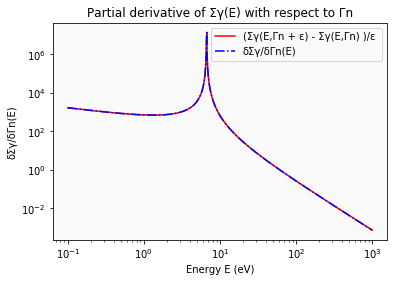

In [11]:
# Energy grid structure
E_max = 10**3 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ

## Plot the mean cross section values. 
plot_title = 'Partial derivative of Σγ(E) with respect to Γn'
plot_title_pdf = "%s.%s"%(plot_title, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.abs(np.array([(evaluate_Σγ(E_g[g], Γ_U238_ε_Γn) - evaluate_Σγ(E_g[g], μ_Γ_U238) )/ε for g in range(E_g.size)])) , '-r', label='(Σγ(E,Γn + ε) - Σγ(E,Γn) )/ε ') 
plt.loglog(E_g , np.abs(np.array([ dΣγ_dΓ(E_g[g], μ_Γ_U238)[1] for g in range(E_g.size)])) , '-.b', label='δΣγ/δΓn(E)') 
plt.ylabel('δΣγ/δΓn(E)')
plt.xlabel('Energy E (eV)')
plt.title(plot_title)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

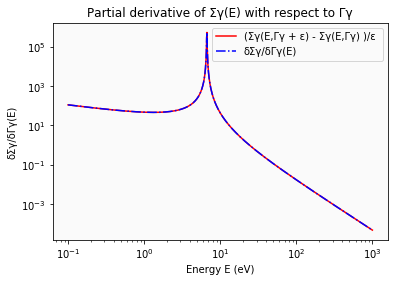

In [12]:
# Energy grid structure
E_max = 10**3 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ

## Plot the mean cross section values. 
plot_title = 'Partial derivative of Σγ(E) with respect to Γγ'
plot_title_pdf = "%s.%s"%(plot_title, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.abs(np.array([(evaluate_Σγ(E_g[g], Γ_U238_ε_Γγ) - evaluate_Σγ(E_g[g], μ_Γ_U238) )/ε for g in range(E_g.size)])) , '-r', label='(Σγ(E,Γγ + ε) - Σγ(E,Γγ) )/ε ') 
plt.loglog(E_g , np.abs(np.array([ dΣγ_dΓ(E_g[g], μ_Γ_U238)[2] for g in range(E_g.size)])) , '-.b', label='δΣγ/δΓγ(E)') 
plt.ylabel('δΣγ/δΓγ(E)')
plt.xlabel('Energy E (eV)')
plt.title(plot_title)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

#### Sampling from resonance parameters

In [13]:
def sample_Γ_res_parameters(mean_Γ_all, cov_Γ_all): ## This implementation cannot take cross-resonance covariance yet
    Γ_sample = np.copy(mean_Γ_all)
    if mean_Γ_all.shape == (3,): ## This means only 1 resonance 
        Γ_sample = np.random.multivariate_normal(mean_Γ_all, cov_Γ_all) # LOG NORMAL mvln = np.exp(mvn) after sampling multivariate normal FOR NEGATIVE WIDTHS
    else:
        for λ in range(mean_Γ_all.shape[0]):
            Γ_sample[λ] = np.random.multivariate_normal(mean_Γ_all[λ], cov_Γ_all[λ]) # LOG NORMAL mvln = np.exp(mvn) after sampling multivariate normal
    return Γ_sample

No handles with labels found to put in legend.


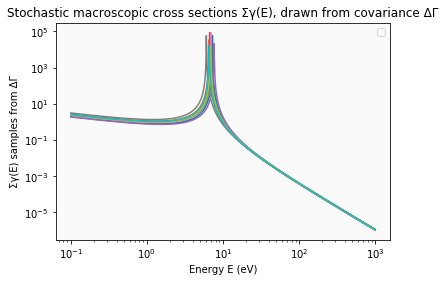

In [14]:
## Plot the cross sections from nuclear data uncertainty
titre_ΔΣ = 'Stochastic macroscopic cross sections Σγ(E), drawn from covariance ΔΓ'
titre_ΔΣ_pdf = "%s.%s"%(titre_ΔΣ, 'pdf')

#plt.close('all')
# Plotting the sampled cross sections
for i in range(10):
    Γ_sample = sample_Γ_res_parameters(μ_Γ_U238, cov_Γ_U238)
    plt.loglog(E_g , np.array([evaluate_Σγ(E_g[g], Γ_sample) for g in range(E_g.size)])) #, '--r') 
plt.ylabel('Σγ(E) samples from ΔΓ')
plt.xlabel('Energy E (eV)')
plt.title(titre_ΔΣ )
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

In [15]:
E_0 = E_g[300]
E_0

1.589282865622978

In [16]:
E_g.shape

(1000,)

In [17]:
np.dot(cov_Γ_U238,dΣγ_dΓ(E_0, μ_Γ_U238))

array([-2.08113859e-01,  2.61081204e-06,  8.82387311e-10])

In [18]:
num_bins = 100

Σγ_hist = np.array([evaluate_Σγ(E_0, sample_Γ_res_parameters(μ_Γ_U238, cov_Γ_U238))  for i in range(1000)])

Σγ_mean = evaluate_Σγ(E_0, μ_Γ_U238)

Σγ_sigma_at_E0 = np.dot(dΣγ_dΓ(E_0, μ_Γ_U238), np.dot(cov_Γ_U238,dΣγ_dΓ(E_0, μ_Γ_U238)))

Σγ_local_propagation = ((1 / (np.sqrt(2 * np.pi) * Σγ_sigma_at_E0)) *
     np.exp(-0.5 * (1 / Σγ_sigma_at_E0 * (bins - Σγ_mean))**2))**2

ax.plot(bins, Σγ_local_propagation, '--r')

fig, ax = plt.subplots()

n, bins, patches = ax.hist(Σγ_hist, num_bins, density=1)


NameError: name 'bins' is not defined

In [ ]:
import cmath

In [ ]:
cmath.sqrt(cmath.exp(2*cmath.pi*1j))

In [ ]:
cmath.polar(cmath.exp(2*cmath.pi*1j))

In [ ]:
cmath.polar(cmath.exp(4*cmath.pi*1j))

In [ ]:
cmath.sqrt(cmath.exp(4*cmath.pi*1j))

In [ ]:

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [ ]:
## Plot the cross sections from nuclear data uncertainty
titre_ΔΣ_E0 = 'Capture cross sections Σγ_hist(E), drawn from covariance ΔΓ'
titre_ΔΣ_E0_pdf = "%s.%s"%(titre_ΔΣ_E0, 'pdf')

Σγ_hist = []
# Plotting the sampled cross sections
for i in range(10):
    print(i)
    Γ_sample =  sample_Γ_res_parameters(μ_Γ_U238, cov_Γ_U238)
    Σγ_hist.append(evaluate_Σγ(E_g[666], Γ_sample))
    print(evaluate_Σγ(E_g[666], Γ_sample))
    plt.hist( Σγ_hist, 100, density= 1 )# , label='Σγ: hist.')#, '--r', label='Σ_γ: hist.')     
plt.ylabel('Cross section Density: Σγ(E_0)')
plt.xlabel('Cross section Value: Σγ(E_0)')
plt.title(titre_ΔΣ )
plt.legend()
    
plt.rcParams['axes.facecolor'] = '0.98'

## VF SLBW for mean poles and residues


Generate training points from the cross section

In [ ]:
E_max_train = 10**5 # Minimum energy of the energy groups
E_min_train = 10**-3 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g_train = 10000 # Number of energy groups
z_train = np.logspace(np.log10(E_min_train),np.log10(E_max_train),N_g_train) # Energy groups (here log-spaced) for flux ψ
Y_train1 = np.array([z_train[g]**0.5*evaluate_Σγ(z_train[g], μ_Γ_U238) for g in range(z_train.size)]) #if you want


In [ ]:
Y_train = np.transpose(np.array([Y_train1, Y_train1]))

VF algorithm results

In [ ]:
VF_poles, VF_residues, VF_poly_coeff, VF_offset, VF_residual, barycentric_residues = VF_algorithm(z_train, Y_train, 100, 0, 2) ## add VF_poly_coeff when poly_order not zero 

In [ ]:
## VF results
z_train  ## for complex values : 2*np.random.rand(number_CV_points)*np.exp(1j*2*np.pi*np.random.rand(number_CV_points))
dim_residues = Y_train[0].size
Y_VF = np.zeros([z_train.size, dim_residues] , dtype=complex) ## VF solution
for k in range(z_train.size):
    Y_VF[k] = z_train[k]**(-0.5)*rational_function(z_train[k], VF_poles, VF_residues, VF_offset, VF_poly_coeff) # add when poly_order not zero : VF_poly_coeff)

In [ ]:
## Plotting the VF results v/s the true model data (log-space data is in absolute value)
fig_true_vs_VF = plt.figure()
plt.loglog(z_train, np.real(np.array([Y_VF[g] for g in range(z_train.size)])), '-r', label='Σ_VF')
plt.loglog(z_train, np.real(np.array([z_train[g]**(-0.5)*Y_train[g] for g in range(z_train.size)])), '-.k', label='Σ_train')
plt.xlabel('Σ: original v/s VF')
plt.ylabel('Energy E in (eV)]')
plot_title = 'Cross sections Σ: SLBW vs VF'
plt.title(plot_title)
plt.legend()
#plt.show()
plt.rcParams['axes.facecolor'] = '0.98'


In [ ]:
plt.scatter(np.real(VF_poles), np.imag(VF_poles), s=80, facecolors='none', edgecolors='r')
plt.show()

In [ ]:
VF_poles

In [ ]:
VF_offset

In [ ]:
VF_poly_coeff

## Contour Integrals


In [ ]:
def Σγs(s):
    return Σγ(s,μ_Γ_U238)

In [ ]:
def f_flat(z):
    return np.array([1+1j, 1-1j])

In [ ]:
def rat1(z):
    return 10 + (1+1j)/(z-1) + (2+2*1j)/(z-1)**2

In [ ]:
def divide_by_z_pow_n(f,n):
    def z_pow_n(z):
        return f(z)/(z**n)
    return z_pow_n

In [ ]:
def multiply_by_z_min_p(f,p):
    def z_pow_n(z):
        return f(z)*(z-p)
    return z_pow_n

In [ ]:
def rat2(z):
    return np.array([(1+1j)/(1 - z), (1-1j)/(1j - z)])

In [ ]:
def sqrt_vs_pole(z):
    return np.array([(1+1j)/(z), (1-1j)/(z**(0.5))])

In [ ]:
## Cauchy Residues Theorem
def Cauchy_residues_extraction(f,p, N_contour = 10000 , ε = 0.00001):
    contour_integral = f(p+ε)*complex(0.0)
    for n in range(N_contour):
           contour_integral += (ε/N_contour)*f(p+ε*np.exp(2*np.pi*1j*(n/N_contour)))*np.exp(2*np.pi*1j*(n/N_contour))
    return contour_integral         

In [ ]:
Cauchy_residues_extraction(f_flat, 1+1j)

In [ ]:
Cauchy_residues_extraction(rat2, 1+1j)

In [ ]:
Cauchy_residues_extraction(rat2, 1)

In [ ]:
Cauchy_residues_extraction(rat2, 1j)

In [ ]:
Cauchy_residues_extraction(rat1, 1+1j)

In [ ]:
Cauchy_residues_extraction(divide_by_z_pow_n(rat1,1), 0)

In [ ]:
Cauchy_residues_extraction(divide_by_z_pow_n(rat1,1), 2)

In [ ]:
Cauchy_residues_extraction(multiply_by_z_min_p(rat1,1), 0)

In [ ]:
Cauchy_residues_extraction(multiply_by_z_min_p(rat1,1), 1)

In [ ]:
Cauchy_residues_extraction(sqrt_vs_pole, 0)

In [ ]:
def Cauchy_residues_extraction_2_turns(f,p, N_contour = 100000 , ε = 0.001):
    contour_integral = f(p+ε)*complex(0.0)
    for n in range(N_contour):
           contour_integral += (2*ε/N_contour)*f(p+ε*np.exp(4*np.pi*1j*(n/N_contour)))*np.exp(4*np.pi*1j*(n/N_contour))
    return contour_integral/2

In [ ]:
Cauchy_residues_extraction_2_turns(sqrt_vs_pole, 0)

In [ ]:
np.angle((1-1j)**(0.5))

In [ ]:
np.angle(np.exp(3*np.pi*1j))

In [ ]:
def Cauchy_residues_extraction_2_turns(f,p, N_contour = 100000 , ε = 0.001):
    contour_integral = f(p+ε)*complex(0.0)
    for n in range(N_contour):
           contour_integral += (ε/N_contour)*f(p+ε*np.exp(2*np.pi*1j*(n/N_contour)))*np.exp(2*np.pi*1j*(n/N_contour)) - (ε/N_contour)*f(p+ε*np.exp(2*np.pi*1j*(n/N_contour)))*np.exp(2*np.pi*1j*(n/N_contour)) 
    return contour_integral/2

In [ ]:
Cauchy_residues_extraction_2_turns(sqrt_vs_pole, 0)

### Sensitivities by Contour Integrals

In [ ]:
def dΣγ_dΓ_complex(E): ## The most simple SLBW caputre resonance
    return dΣγ_dΓ(E, μ_Γ_U238)

In [ ]:
C_z_p = Cauchy_residues_extraction(multiply_by_z_min_p(dΣγ_dΓ_complex,VF_poles[0]),VF_poles[0])

In [ ]:
C_z_p

In [ ]:
C_at_p = Cauchy_residues_extraction(dΣγ_dΓ_complex,VF_poles[0])

In [ ]:
C_at_p

In [ ]:
C_by_z_at_0 = Cauchy_residues_extraction(divide_by_z_pow_n(dΣγ_dΓ_complex,1), 0)

In [ ]:
C_by_z_at_0 

In [ ]:
VF_offset

In [ ]:
def sensitivities_δΠ_δΓ(dΣγ_dΓ, Γ , Π ):
    return 'NOT CODED YET'